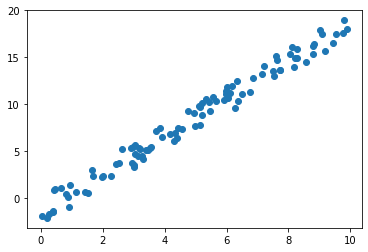

In [2]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [3]:
x.shape

(100,)

In [4]:
y.shape

(100,)

x와 y의 모양은 (100,) 으로 1차원 벡터.

사이킷런에서 머신러닝 모델을 사용하기 위해서 모델 객체를 생성

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#모델을 훈련해보자
# ! 에러발생
model.fit(x,y)

데이터를 그대로 넣으면 에러가 발생한다.

x를 행렬로 바꾸어주어야함. 어떻게 바꾸면 좋을까?

x는 numpy 의 ndarray 타입이니 reshape()를 사용하자.

통상 특성 행렬의 변수명은 X로 한다.


In [7]:
X = x.reshape(100,1)
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

새로운 데이터를 넣고 예측을 해보자.

새로운 데이터는 np.linspace()를 이용해서 생성하자.

예측은 predict()를 사용하자. predict()의 인자 역시 행렬로 넣어주어야 한다.


In [11]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100, 1)
y_new = model.predict(X_new)

reshape() 함수에서 나머지 숫자를 -1로 넣으면 자동으로 남은 숫자를 계산해 준다.

즉, x_new 의 인자의 개수가 100개이므로, (100, 1)의 형태나 (2, 50)의 형태 등으로 변환해 줄 수 있는데, (2, -1)을 인자로 넣으면 (2, 50)의 형태로 자동으로 변환해줌

In [12]:
X_ = x_new.reshape(-1, 1)
X_.shape

(100, 1)

학습된 회귀 모델이 잘 예측 했는지 모델의 성능을 평가해 보자.

sklearn.metrics에 모델의 성능평가 관련 모듈이 저장되어 있음.

회귀 모델의 경우 RMSE(Root Mean Square Error)를 사용해 성능을 평가


In [13]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y, y_new))

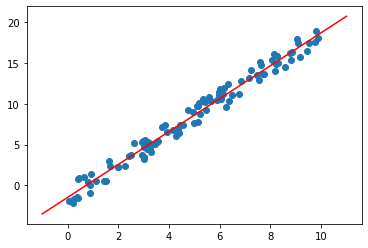

In [14]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

sklearn.datasets 모듈은 크게 dataset loaders와 dataset fetchers로 나뉘며, 각각 Toy dataset 과 Real World dataset 을 제공하고 있습니다.

우리는 Toy dataset 을 다뤄볼 예정입니다.

Toy dataset 의 예시입니다.

datasets.load_boston() : 회귀 문제, 미국 보스턴 집값 예측

datasets.load_breast_cancer() : 분류 문제, 유방암 판별

datasets.load_digits() : 분류 문제, 0 ~ 9 숫자 분류

datasets.load_iris() : 분류 문제, iris 품종 분류

datasets.load_wine() : 분류 문제, 와인 분류

우리는 와인 데이터셋을 이용하겠습니다.

datasets.load_wine() 뜯어보기

In [15]:
from sklearn.datasets import load_wine
data = load_wine()
type(data)

sklearn.utils.Bunch

sklearn.utils.Bunch 라고 하는 데이터 타입이네요? 

Bunch 는 파이썬의 딕셔너리와 유사한 형태의 데이터 타입입니다.

In [16]:
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

data를 출력해 보면 데이터들이 중괄호에 {} 담겨져있고 콜론 : 을 이용해서 구분되어 있습니다.

바로 key와 value입니다. 번치 데이터 타입에도 파이썬의 딕셔너리 메소드인 keys()를 사용할 수 있어요.

In [17]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

1.data

In [21]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

특성 행렬은 2차원이며 행에는 데이터의 개수(n_samples)가 열에는 특성의 개수(n_features)가 들어 있습니다.


In [22]:
data['data'].shape

(178, 13)

특성이 13개 데이터가 178개인 특성 행렬이 나왔다

In [23]:
data.data.ndim

2

ndim 을 이용해 차원을 확인할 수 있다. 2차원이다

2. target

In [24]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

타겟 벡터는 1차원이다. 그리고 타겟 벡터의 길이는 특성 행ㅎ렬의 데이터 개수와 일치해야 한다.

In [25]:
data['target'].shape

(178,)

(178,0) 이 나왔다. 특성 행렬의 데이터 수와 일치한다.

feature_names

data 키에 접근해서 data의 값을 확인해 본 결과 특성이 13개임을 확인

이 특성들의 이름은 feature_names 란 키에 특성들의 이름이 저장되어 있다.


In [26]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

feature의 개수를 확인해 보자

In [29]:
len(data['feature_names'])

13

feature_names의 개수와 특성 행렬의 n_features(열)의 숫자가 일치

3.target_names

target_names는 분류하고자 하는 대상

In [30]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

데이터를 각각 class_0, class_1, class_2로 분류한다는 뜻

.DESCR

DESCR 은 describe 의 약자로 데이터에 대한설명이다.

In [32]:
data.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

DataFrame 으로 나타내기
특성행렬을 Pandas의 DataFrame으로 나타낼 수 있다고 했습니다.


In [42]:
import pandas as pd
pd.DataFrame(data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


머신러닝

이제 머신러닝 모델을 만들고 예측을 해보자

특성 행렬은 통상 변수명 x 에 저장하고, 타겟 벡터는 y에 저장한다고 했다.

In [44]:
X = data.data
y = data.target

모델을 생성합니다. 이번에는 분류 문제이므로 RandomForestClassifier를 사용해 보자

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [46]:
#모델 훈련
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
#예측
y_pred = model.predict(x)

성능을 평가해보도록 하자

성능은 sklearn.metrics 모듈을 사용한다고 했다. 

분류 문제의 경우 classfication_report 와 accuracy_score를 이용한다.

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred를 각 각 인자로 넣는다.
print(classification_report(y, y_pred))
#정확도를 출력한다.
print("accuracy = ", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy =  1.0


정확도가 1, 즉 100%가 나왔다. 이부분은 이후 설명 하도록 하겠다.

사이킷 런의 주요 모듈 Estimator

Estimator 객체

데이터셋을 기반으로 머신러닝 모델의 파라미터를 추정하는 객체를 Estimator라고 합니다.

사이킷런의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 구현되어 있습니다.

추정을 하는 과정 즉, 훈련은 Estimator 의 fit() 메소드를 통해 이루어지고 예측은 predict() 메소드를 통해 이루어 집니다

앞에 실습에서 사용한 Estimaor 객체는 LinearRegression()과 RandomForestClassifier()입니다.

정답이 없는 데이터 인 비지도 학습의 경우는 fit() 메소드의 인자로 Target Vector가 들어가지 않습니다.

사이킷런의 Estimator 객체를 사용한다면 비지도학습, 지도학습에 관계 없이 학습과 예측을 할 수 있습니다.



훈련데이터와 테스트데이터 분리하기

앞의 와인 분류 문제에서 정확도가 100%로 나온 것을 기억하는가? 

Estimator객체에 fit() 과 prediction() 메소드에 인자로 각기 다른 데이터가 들어가야 한다.

처음에 우리는 훈련에 사용되는 데이터와 예측에 사용되는 데이터에 같은 값을 넣었다.

즉 동일한 데이터로 훈련과 예측을 하니 정확도가 100%로 나왔다.

훈련데이터와 테스트 데이터 직접 분리하기

In [49]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


전체 데이터의 개수는 178개 이다. 

8:2로 특성 행렬과 타겟 벡터를 나누어 보도록 하자.

데이터의 개수 이므로 정수 개만 가능, 178개의 80%면 142.4, 정수로 표현하면 142개, 그리고 학습 데이터는 나머지 36개로 나누어 보자


In [50]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [51]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

(142,) (36,)


훈련 데이터와 테스트 데이터의 분리가 끝났다. 다시 훈련과 예측을 해보자


In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
y_pred = model.predict(X_test)

In [64]:
#정확도 평가
from sklearn.metrics import accuracy_score
print("정답률=",accuracy_score(y_test, y_pred))

정답률= 0.9722222222222222


train_test_split() 사용해서 분리하기
훈련데이터와 테스트 데이터 분리는 필수 기능이다.

사이킷런에서는 이 필수 기능을 api로 제공한다. 

바로 modeel_selection 의 train_test_split() 함수다.


In [65]:
from sklearn.model_selection import train_test_split
result = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_split() 은 반환값으로 4개의 원소로 이루어진 list를 반환

리스트 원소의 데이터 타입은 array

In [66]:
print(type(result))
print()
print(len(result))

<class 'list'>

4


각각 모양을 확인

In [67]:
result[0].shape


(142, 13)

In [68]:

result[1].shape


(36, 13)

In [69]:

result[2].shape


(142,)

In [70]:

result[3].shape

(36,)

0번 원소부터 순서대로 훈련 데이터용 특성 행렬.

1 테스트 데이터용 특성 행렬

2 훈련 데이터용 타겟 벡터

3 테스트 데이터용 타겟 벡터.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#데이터셋 로드하기
#훈련용 데이터셋 나누기
#훈련하기
#예측하기
#정답률 출력하기


#와인 데이터셋을 불러온다
from sklearn.datasets import load_wine
#훈련,검증용 데이터 분류기를 불러온다
from sklearn.model_selection import train_test_split
#랜덤포레스트를 불러온다
from sklearn.ensemble import RandomForestClassifier
#성능평가를 위해서 정확도점수를 가져오자
from sklearn.metrics import accuracy_score

#와인데이터를 변수에 저장
data = load_wine()
#train_test_split을 이용해 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size=0.2, random_state=11)
#데이터 변수에서 데이터랑(문제지), 타겟(답안지)을 가져옴
#모델을 만듦
model = RandomForestClassifier()
#모델에 훈련용 문제와 답안지를 넣어 학습
model.fit(X_train, y_train)
#모델.predict에 X_test 를 넣어서 예측값을 만들어 변수에 저장
y_pred = model.predict(X_test)
#성능평가점수확인
print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9722222222222222
